In [12]:
pip install seaborn


     |████████████████████████████████| 215 kB 5.5 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn
from pprint import pprint
np.random.seed(sum(map(ord, "aesthetics")))
seaborn.set_context('notebook')


(300, 2) (300,)


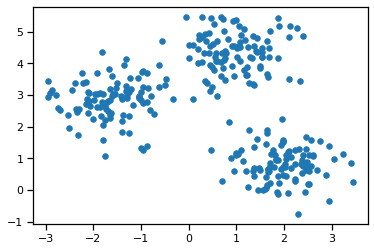

In [18]:
#Generer des samples aléatoires  (blobs) 
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=300, centers=3,
                  random_state=0, cluster_std=0.60)
print (X.shape, y.shape) 
plt.scatter(X[:, 0], X[:, 1], s=30, cmap=plt.cm.Paired);

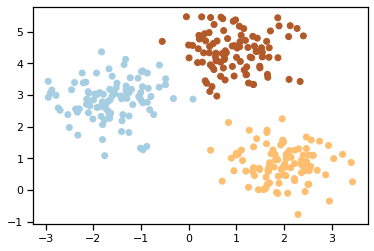

In [19]:
#Les clusturs sont facile à identifier
#Le fameux algorithm des K-means

from sklearn.cluster import KMeans
ktest = KMeans(n_clusters=3) 
ktest.fit(X) 
y_pred = ktest.predict(X)

#Dessiner les labels à predicter avec sctter
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap=plt.cm.Paired)
plt.show()



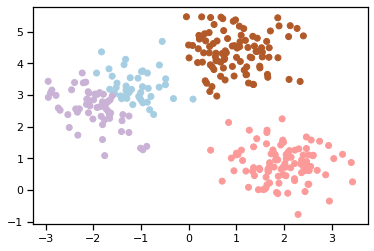

In [20]:
#Changemement des parametres 
#On essaye de trouver 4 clusters au lieu de 3

ktest = KMeans(n_clusters=4) 
ktest.fit(X) 
y_pred = ktest.predict(X)

#Dessiner les labels à predicter avec scatter
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap=plt.cm.Paired)
plt.show()



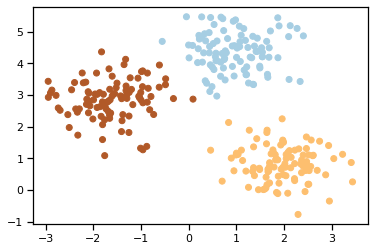

In [21]:
#On fait des chagements 

#Configurer le nb max des iterations à 100 au lieu de 300

ktest = KMeans(n_clusters=3, max_iter=100)
ktest.fit(X) 
y_pred = ktest.predict(X) 
#Dessiner les labels à predicter avec scatter
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap=plt.cm.Paired)
plt.show()

(300, 2) (300,)


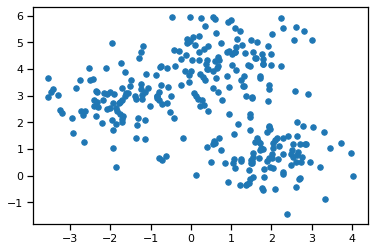

In [23]:
#Rendons la difficile en utilisant le paramétre cluster_std 

X, y = make_blobs(n_samples=300, centers=3,
                  random_state=0, cluster_std=0.85)
print (X.shape, y.shape) 

#Dessiner les labels à predicter avec scatter
plt.scatter(X[:, 0], X[:, 1], s=30, cmap=plt.cm.Paired)
plt.show()

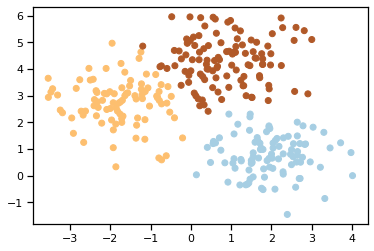

In [24]:
#Avec  100 iterations

ktest = KMeans(n_clusters=3, max_iter=100) 
ktest.fit(X) 
y_pred = ktest.predict(X) 

#Plotting predicted labels as a scatter
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap=plt.cm.Paired)
plt.show()

#Bon résultat

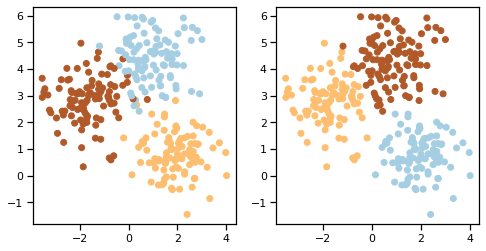

In [26]:
#Comparons les labels des cluster et les labels original (Avec scatter)
fig, ax=plt.subplots(1,2,figsize=(8,4))
ax[0].scatter(X[:,0], X[:,1],c=y, cmap=plt.cm.Paired)
ax[1].scatter(X[:,0], X[:,1],c=y_pred, cmap=plt.cm.Paired)
plt.show()


In [37]:
from sklearn.datasets import load_digits
digits = load_digits()
print (digits.keys)
print (digits.data.shape)
print (digits.target)
print (digits.images.shape)

<built-in method keys of Bunch object at 0x7fa4cb6b3150>
(1797, 64)
[0 1 2 ... 8 9 8]
(1797, 8, 8)


In [40]:
#On uilise des K-means pour trouver des Clusters
X,y=digits.data, digits.target
k_digits = KMeans(n_clusters=10)
y_pred=k_digits.fit_predict(X)
print (k_digits.cluster_centers_.shape)

(10, 64)


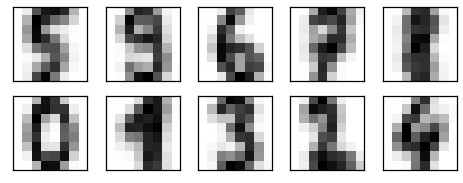

In [41]:
fig = plt.figure(figsize=(8,3))
for i in range(10):
    ax = fig.add_subplot(2, 5, i+1, xticks=[], yticks=[])
    ax.imshow(np.reshape(k_digits.cluster_centers_[i],(8,8)), cmap=plt.cm.binary)



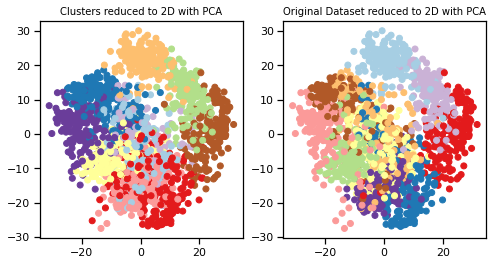

In [48]:
#On utilise PCA pour réduire la dimension pour visualiser en 2D
from sklearn.decomposition import PCA as RandomizedPCA
pca=RandomizedPCA(2).fit(X)
X_proj = pca.transform(X)

fig, ax = plt.subplots(1, 2, figsize=(8,4))
ax[0].scatter(X_proj[:,0], X_proj[:,1], c=y_pred, cmap=plt.cm.Paired)
ax[0].set_title('Clusters reduced to 2D with PCA', fontsize=10)

ax[1].scatter(X_proj[:,0], X_proj[:,1], c=y, cmap=plt.cm.Paired)
ax[1].set_title('Original Dataset reduced to 2D with PCA', fontsize=10)

plt.show()

